# Module 1 Project - Technical Notebook - Alex + VJ

## Step 1: Import Libraries + Set Up Preferred Presets

Import all libraries required: numpy, pandas, matplotlib, and seaborn.

In [1112]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

We will set up the ability to see more rows and columns in dataframes, so we can see more information at a time.

In [1023]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

__________

## Step 2: Read Selected CSVs To Dataframes

Load 3 selected CSVs to bring data into Jupyter Notebook.<br>
Show .head() and .info() for all imported dataframes to get a feel for the data. 

In [1024]:
df_imdb = pd.read_csv('imdb.title.basics.csv.gz')
display(df_imdb.head())
display(df_imdb.info())
df_tn = pd.read_csv('tn.movie_budgets.csv.gz')
display(df_tn.head())
display(df_tn.info())
df_tmdb = pd.read_csv('tmdb.movies.csv.gz')
display(df_tmdb.head())
display(df_tmdb.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

_______

## Step 3: Data Cleaning

We need to convert several columns from str to int for analysis later on.<br>
<br>
<b>Data cleaning for df_tn "domestic_gross"</b><br>
Get rid of money signs ($).<br>
Get rid of commas (,).<br>
Convert str to int.<br>

In [1025]:
#get rid of money signs in df_tn "domestic_gross."
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [1026]:
#get rid of commas in df_tn "domestic_gross."
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [1027]:
#convert df_tn 'domestic_gross' from str to int.
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null object
dtypes: int64(2), object(4)
memory usage: 271.2+ KB


<b>Data cleaning for df_tn "production_budget"</b><br>
Get rid of money signs ($).<br>
Get rid of commas (,).<br>
Convert str to int.<br>

In [1028]:
#get rid of money signs in df_tn "production_budget."
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,$0
5778,79,"Apr 2, 1999",Following,"6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,$0


In [1029]:
#get rid of commas in df_tn "production_budget."
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0


In [1030]:
#convert df_tn 'production_budget' from str to int.
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null object
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


<b>Data cleaning for "worldwide_gross"</b><br>
Get rid of money signs ($).<br>
Get rid of commas (,).<br>
Convert str to int.<br>

In [1031]:
#get rid of money signs in df_tn "worldwide_gross."
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,"240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1032]:
#get rid of commas in df_tn "worldwide_gross."
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1033]:
#convert df_tn 'worldwide_gross' from str to int.
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


<b>Data cleaning for df_tn "release_date"</b><br>
Convert str to datetime object to parse out the "month" in later analysis.<br>

In [1034]:
# convert df_tn release_date to date time object 
df_tn['release_date'] =  pd.to_datetime(df_tn['release_date'], infer_datetime_format=True)
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


<b>Data cleaning for df_tmdb "release_date"</b><br>
Convert str to datetime object to parse out the "month" in later analysis.<br>

In [1035]:
# convert df_tmdb release_date to date time object 
df_tmdb['release_date'] =  pd.to_datetime(df_tmdb['release_date'], infer_datetime_format=True)
df_tmdb.head()
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null datetime64[ns]
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


<b>Data cleaning for value names</b><br>
Convert all columns with string values to lower case for consistency.

In [1036]:
#convert all columns with string values to lower case for consistency.
df_tmdb['title'] = df_tmdb['title'].str.lower()
df_tn['movie'] = df_tn['movie'].str.lower()
df_imdb['primary_title'] = df_imdb['primary_title'].str.lower()
df_imdb['genres'] = df_imdb['genres'].str.lower()
display(df_imdb.head())
display(df_tmdb.head())
display(df_tn.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"action,crime,drama"
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"biography,drama"
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,drama
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"comedy,drama"
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"comedy,drama,fantasy"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


<b>Data cleaning to eliminate unused columns of data</b><br>
We will get rid of columns of data that we are not considering in our analysis.

In [1037]:
# drop unused columns in all dataframes
df_imdb_edit = df_imdb.drop(['tconst','original_title','start_year','runtime_minutes'], axis =1)
df_tn_edit = df_tn.drop(['id','domestic_gross'], axis =1)
df_tmdb_edit = df_tmdb.drop(['Unnamed: 0','genre_ids','id','original_title'], axis =1)
#drop release_date from "df_tmdb_edit" since we already have a "release_date" in "df_tn_edit"
df_tmdb_edit = df_tmdb_edit.drop('release_date', axis=1)

display(df_imdb_edit.head())
display(df_tmdb_edit.head())
display(df_tn_edit.head())

,primary_title,genres
0,sunghursh,"action,crime,drama"
1,one day before the rainy season,"biography,drama"
2,the other side of the wind,drama
3,sabse bada sukh,"comedy,drama"
4,the wandering soap opera,"comedy,drama,fantasy"


,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747


<b>Data cleaning to eliminate duplicate rows</b><br>
We will get rid of any duplicate rows in our dataset.

In [1038]:
#eliminate any duplicates in df_imdb_edit and reassign.
df_imdb_edit = df_imdb_edit.drop_duplicates(subset=None, keep='first')
display(df_imdb_edit)
#eliminate any duplicates in df_tn_edit and reassign.
df_tn_edit = df_tn_edit.drop_duplicates(subset=None, keep='first')
display(df_tn_edit)
#eliminate any duplicates in df_tn_edit and reassign.
df_tmdb_edit = df_tmdb_edit.drop_duplicates(subset=None, keep='first')
display(df_tmdb_edit)

,primary_title,genres
0,sunghursh,"action,crime,drama"
1,one day before the rainy season,"biography,drama"
2,the other side of the wind,drama
3,sabse bada sukh,"comedy,drama"
4,the wandering soap opera,"comedy,drama,fantasy"
...,...,...
146139,kuambil lagi hatiku,drama
146140,rodolpho teóphilo - o legado de um pioneiro,documentary
146141,dankyavar danka,comedy
146142,6 gunn,NaN


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747
...,...,...,...,...
5777,2018-12-31,red 11,7000,0
5778,1999-04-02,following,6000,240495
5779,2005-07-13,return to the land of wonders,5000,1338
5780,2015-09-29,a plague so pleasant,1400,0


,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186
...,...,...,...,...,...
26512,en,0.600,laboratory conditions,0.0,1
26513,en,0.600,_exhibit_84xxx_,0.0,1
26514,en,0.600,the last one,0.0,1
26515,en,0.600,trailer made,0.0,1


<b>Data cleaning to eliminate NaN values</b><br>
We will check for, and get rid of any NaN values in our dataset.

In [1039]:
# check to see how many "NaN" values in df_imdb_edit
display(df_imdb_edit.isna().sum())
# drop the Nan rows 
df_imdb_edit = df_imdb_edit.dropna()
# check to see how many "NaN" values in df_tn_edit - NONE. No .dropna() needed.
display(df_tn_edit.isna().sum())
# check for 'Nan' values in df_tmdb)edit - NONE. No .dropna() needed.
display(df_tmdb_edit.isna().sum())

primary_title       0
genres           5352
dtype: int64

release_date         0
movie                0
production_budget    0
worldwide_gross      0
dtype: int64

original_language    0
popularity           0
title                0
vote_average         0
vote_count           0
dtype: int64

<b>Data cleaning to prepare for merge</b><br>
We will change "primary_title" in df_imdb_edit and "title" in df_tmdb_edit to "movie" to match df_tn_edit, and make the "movie" column name consistent across the 3 data sets

In [1040]:
#We will change "primary_title" in df_imdb_edit and "title" in df_tmdb_edit to "movie" to match df_tn_edit, and make the "movie" column name consistent across the 3 data sets
df_imdb_edit = df_imdb_edit.rename(columns = {"primary_title": "movie"})
df_tmdb_edit = df_tmdb_edit.rename(columns = {"title": "movie"})

display(df_imdb_edit.head())
display(df_tmdb_edit.head())
display(df_tn_edit.head())

,movie,genres
0,sunghursh,"action,crime,drama"
1,one day before the rainy season,"biography,drama"
2,the other side of the wind,drama
3,sabse bada sukh,"comedy,drama"
4,the wandering soap opera,"comedy,drama,fantasy"


,original_language,popularity,movie,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,avatar,425000000,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875
2,2019-06-07,dark phoenix,350000000,149762350
3,2015-05-01,avengers: age of ultron,330600000,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747


_____

## Step 4: Merging Datasets

<b>Inner merge all datasets</b><br>
We will inner merge all 3 datasets on 'movie' column, because we want all rows to have data populated on movies that they all have in common.

In [1041]:
#inner merge all 3 datasets on 'movie' column
df_merged = df_tmdb_edit.merge(df_tn_edit, on='movie').merge(df_imdb_edit, on='movie')
df_merged.head()

,original_language,popularity,movie,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres
0,en,28.734,how to train your dragon,7.7,7610,2010-03-26,165000000,494870992,"action,adventure,animation"
1,en,28.515,iron man 2,6.8,12368,2010-05-07,170000000,621156389,"action,adventure,sci-fi"
2,en,27.920,inception,8.3,22186,2010-07-16,160000000,835524642,"action,adventure,sci-fi"
3,en,26.691,percy jackson & the olympians: the lightning t...,6.1,4229,2010-02-12,95000000,223050874,"adventure,family,fantasy"
4,en,26.526,avatar,7.4,18676,2009-12-18,425000000,2776345279,horror


<b>Sorting</b><br>
We will sort movies alphabetically, because the movies will become our index.

In [1042]:
#sort dataframe by movies alphabetically
df_merged = df_merged.sort_values(by='movie', ascending=True)
df_merged.head()

,original_language,popularity,movie,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres
2976,de,6.099,#horror,3.3,102,2015-11-20,1500000,0,"crime,drama,horror"
3180,en,17.892,10 cloverfield lane,6.9,4629,2016-03-11,5000000,108286422,"drama,horror,mystery"
3097,en,0.955,10 days in a madhouse,5.4,7,2015-11-11,12000000,14616,drama
3756,en,13.183,12 strong,5.6,1312,2018-01-19,35000000,71118378,"action,drama,history"
1895,en,16.493,12 years a slave,7.9,6631,2013-10-18,20000000,181025343,"biography,drama,history"


<b>Post-merge cleanup</b><br>
After merging, for any duplicate movies, we will only take the first instance where it shows up.

In [1043]:
#run groupby and take only the first instance of each movie group
df_gp_movie = df_merged.groupby('movie')
df_gp_movie.first()
#reassign back to a dataframe object
df_merged_movie = df_gp_movie.first()
df_merged_movie

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres
movie,,,,,,,,
#horror,de,6.099,3.3,102,2015-11-20,1500000,0,"crime,drama,horror"
10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,"drama,horror,mystery"
10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama
12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,"action,drama,history"
12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,"biography,drama,history"
...,...,...,...,...,...,...,...,...
zipper,en,9.373,5.7,85,2015-08-28,4500000,0,"drama,thriller"
zookeeper,en,10.764,5.3,886,2011-07-08,80000000,170805525,"comedy,family,romance"
zoolander 2,en,12.997,4.7,1374,2016-02-12,50000000,55348693,comedy


<b>Manipulating "genres" data</b><br>
There are movies that have more than one genre, so we decided to convert all data for movies with more than one genre, to become the string "mix".

In [1044]:
#for analysis purposes, change all multiple genre observations into the string "mix"
df_merged_movie.loc[df_merged_movie['genres'].str.contains(','), 'genres'] = 'mix'
df_merged_movie.head()

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres
movie,,,,,,,,
#horror,de,6.099,3.3,102,2015-11-20,1500000,0,mix
10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,mix
10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama
12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,mix
12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,mix


<b>Adding "release_month" data</b><br>
We are particularly interested in movie release by month - so we will create a new column named "release_month"

In [1045]:
#interested in movie release by month - create new column named "release_month"
df_merged_movie['release_month'] = pd.DatetimeIndex(df_merged_movie['release_date']).month
df_merged_movie.head()

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month
movie,,,,,,,,,
#horror,de,6.099,3.3,102,2015-11-20,1500000,0,mix,11
10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,mix,3
10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama,11
12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,mix,1
12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,mix,10


<b>Manipulating "popularity" data</b><br>
There are some floats in the "popularity" column - and we want to keep the decimal places consistent. So we round to 3 places. 

In [1046]:
#the "popularity" column of float values is rounded to 3 decimal places (significant figures)
df_final = df_merged_movie.round(decimals=3)
df_final['popularity'].head(10)

movie
#horror                   6.099
10 cloverfield lane      17.892
10 days in a madhouse     0.955
12 strong                13.183
12 years a slave         16.493
127 hours                11.435
13 sins                  10.899
1982                      0.600
2 guns                   14.800
20 feet from stardom      7.866
Name: popularity, dtype: float64

<b>Adding "ROI" data</b><br>
For our analysis, we are interested in the "ROI" (Return On Investment) which is "worldwide_gross" minus "production_budget".<br>
We will create a new column for "ROI"

In [1047]:
df_final['ROI'] = df_final['worldwide_gross'] -df_final['production_budget']
df_final['ROI'] = df_final['ROI'].astype(int)
df_final.head()

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
movie,,,,,,,,,,
#horror,de,6.099,3.3,102,2015-11-20,1500000,0,mix,11,-1500000
10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,mix,3,103286422
10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama,11,-11985384
12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,mix,1,36118378
12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,mix,10,161025343


<b>Exporting final dataset</b><br>
We will export the final dataset, for future reference if desired.

In [1048]:
#export final dataframe to csv as required by project deliverables.
#(commented out below after exporting. Uncomment to run again if desired.)
#df_final.to_csv('df_final_alex_vj', encoding='utf-8', index=True)

## Step 5: Data Visualization

From here, we use the final dataframe <b>"df_final"</b> to conduct our analysis and discover insights.<br>
<br>
<b>Steps:</b><br>
<br>
<b>Visualization 1: budget vs. ROI (Revenue minus budget) - VJ</b><br>
We already created a new column for ROI.<br>
Produce scatterplot with "production_budget" on x-axis, and "worldwide_gross" on y-axis.<br>

<b>Visualization 2: release month vs. average revenue -Alex</b><br>
We already created a new column for "release_month".<br>
Need the mean of "worldwide_gross" for each "release_month".<br>
Produce lineplot with "release_month" on x-axis, and "worldwide_gross" (averages) on y-axis.<br>

<b>Visualization 3: average rating vs. revenue -Alex</b><br>
We want to see how ratings may impact revenue. The problem is: some movies have high ratings, with a very low vote count.<br>
To fix this, we need to create new dataframe that only provides movies with an "average_vote" when "vote_count" is >= 1000.<br>
Produce scatterplot with "average_vote" (where "vote_count" >= 1000) on x-axis, and "worldwide_gross" on y-axis.<br>

<b>Visualization 4: genres vs. average revenue -VJ</b><br>
We already created a new datatype in "genres" called "mix" if a movie has more than 1 genre associated with it.<br>
Need the mean of "worldwide_gross" for each genre.<br>
Bar plot with "genres" on x-axis, and "worldwide_gross" (averages) on y-axis.

## Visualization 1 -VJ

<b>Question:</b><br>
What is the best / worst performing movies in terms of ROI (Return On Investment)?

In [1049]:
#find maximum ROI value in data
df_final['ROI'].max()

2351345279

In [1050]:
#find row with maximum ROI value to find movie title
df_final.loc[df_final['ROI'] == 2351345279]

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
movie,,,,,,,,,,
avatar,en,26.526,7.4,18676,2009-12-18,425000000,2776345279,horror,12,2351345279


In [1133]:
#find minimum ROI value in data
df_final['ROI'].min()

-110450242

In [1162]:
#find row with minimum ROI value to find movie title
df_final.loc[df_final['ROI'] == -110450242]

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
movie,,,,,,,,,,
mars needs moms,en,8.852,5.7,299,2011-03-11,150000000,39549758,mix,3,-110450242


In [1173]:
df_ROI_sorted = df_final['ROI'].sort_values(ascending=True)
df_ROI_sorted[917]

13662703

In [1174]:
df_final.loc[df_final['ROI'] == 13662703]

,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
movie,,,,,,,,,,
"hello, my name is doris",en,7.802,6.4,265,2016-03-11,1000000,14662703,mix,3,13662703


<b>Graph "Budget" vs. "Return On Investment."</b><br>
Show movies that had a net loss in BLUE, and a net gain in RED.

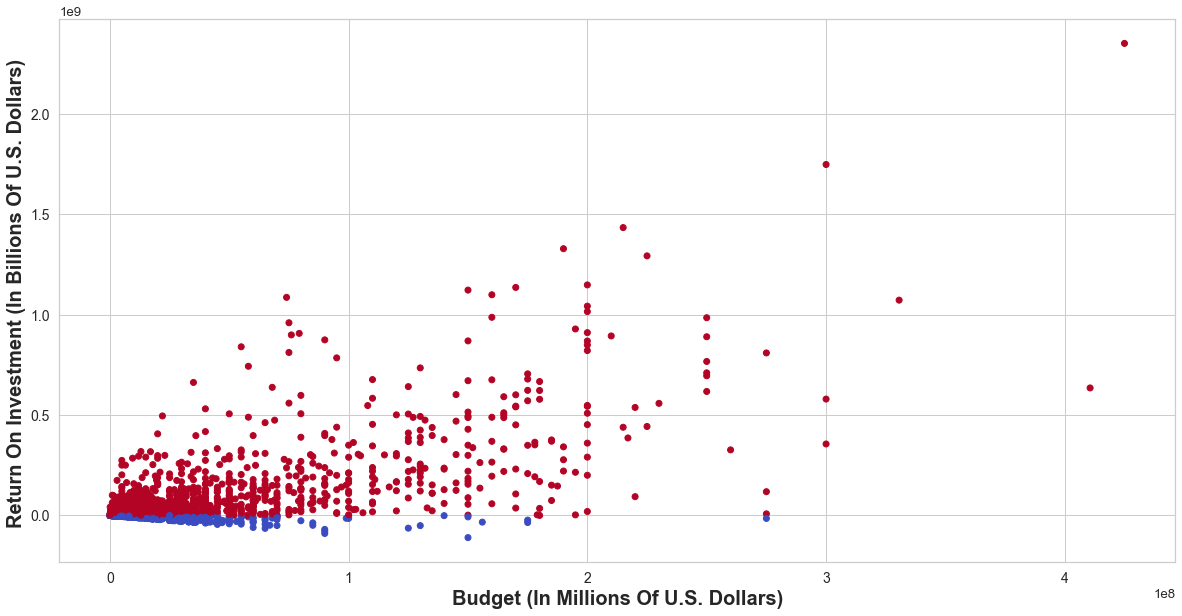

In [1132]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
x = df_final["production_budget"]
y = df_final["ROI"]
df = pd.DataFrame({'x': df_final["production_budget"], 'y': df_final["ROI"]})
plt.xlabel('Budget (In Millions Of U.S. Dollars)', fontsize = 20 , weight ='bold')
plt.ylabel('Return On Investment (In Billions Of U.S. Dollars) ', fontsize = 20, weight ='bold')
# plt.title('ROI Vs Budget', fontsize = 17 , weight='bold')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
ax.scatter(df.x, df.y, c=np.sign(df.y), cmap="coolwarm")
plt.show()

# Visualization 2 -Alex

<b>Getting the average revenue per month</b><br>
Since we are graphing by month, we need to provide the average revenue per month, so we need a revised dataframe to work with.

In [1081]:
month_average = df_final[['release_month', 'worldwide_gross']]
month_average_grouped = month_average.groupby('release_month', as_index=False).mean()
month_average_grouped

,release_month,worldwide_gross
0,1,6.648210e+07
1,2,1.004242e+08
2,3,1.068055e+08
3,4,9.629589e+07
4,5,1.881098e+08
5,6,2.130128e+08
6,7,1.647975e+08
7,8,7.502188e+07
8,9,6.140103e+07
9,10,6.698804e+07


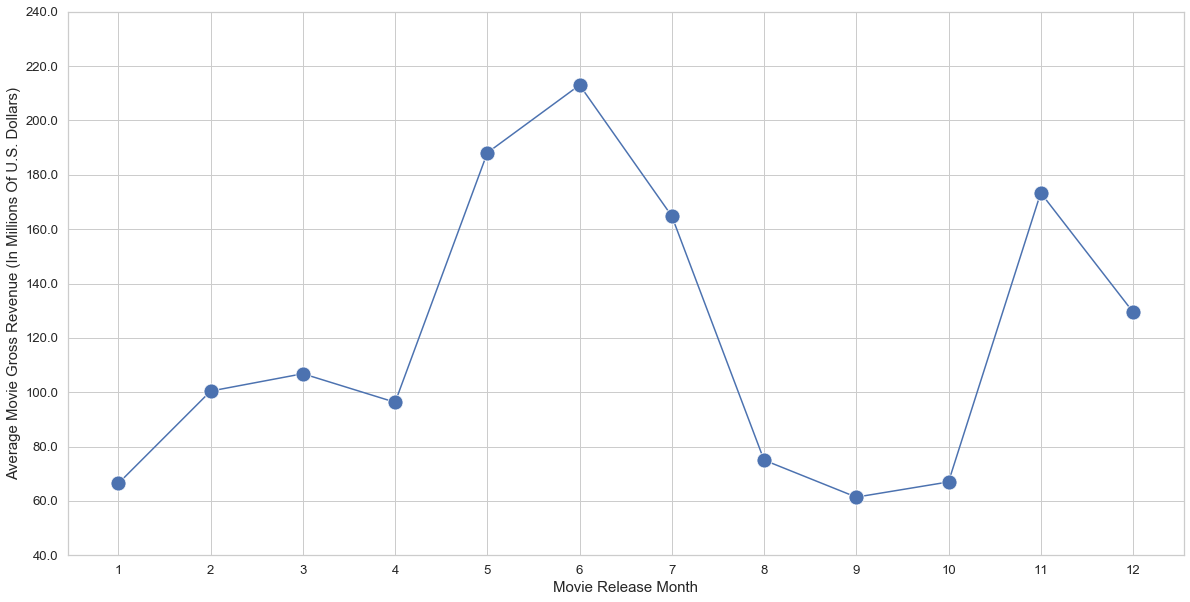

In [1131]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

ax = sns.lineplot(x="release_month", y="worldwide_gross", marker="o", ci=0, markersize=15, data=month_average_grouped)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(1))
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.ylabel('Average Movie Gross Revenue (In Millions Of U.S. Dollars)', fontsize=15)
plt.xlabel('Movie Release Month', fontsize=15)
sns.set(style='whitegrid', font_scale=1.2)
plt.show()

## Visualization 3 -Alex

<b>Exploring "vote_count", "vote_average", and "popularity"</b><br>
We want to get a feel for these 3 variables to see if there is a strong correlation with "worldwide_gross".

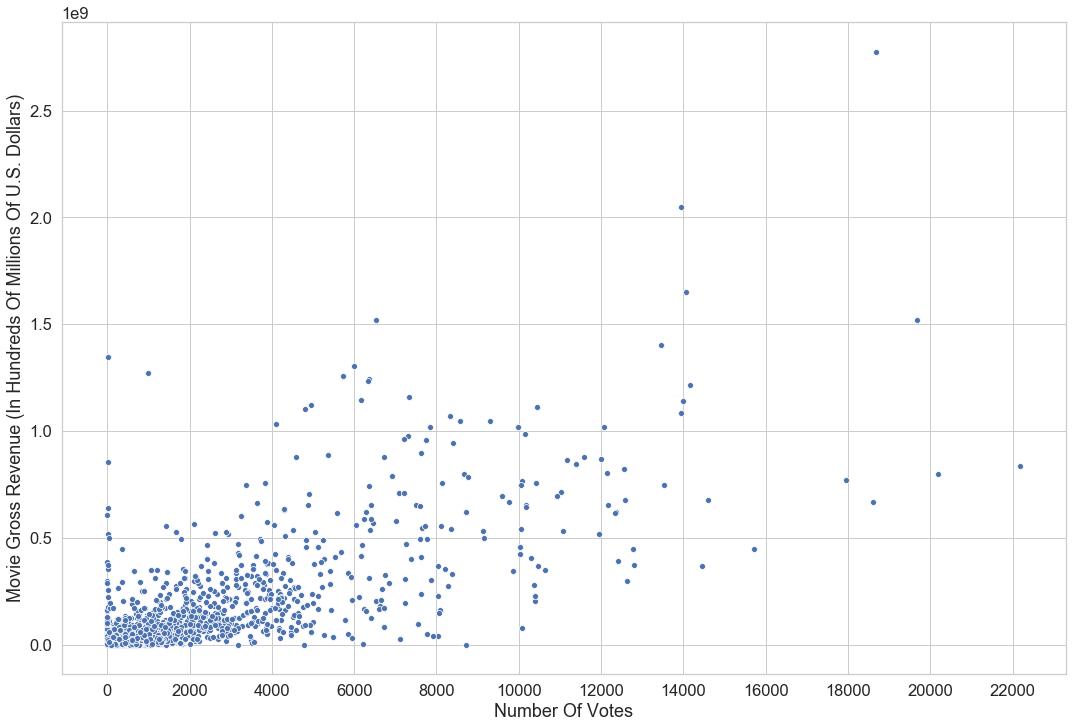

In [1177]:
#scatterplot of vote_count vs. worldwide_gross
fig, ax = plt.subplots()
fig.set_size_inches(18,12)

ax = sns.scatterplot(x="vote_count", y="worldwide_gross", marker="o", ci=68, data=df_final)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Number Of Votes', ylabel='Movie Gross Revenue (In Hundreds Of Millions Of U.S. Dollars)')
sns.set(style='whitegrid', font_scale=1.5)
plt.show()

##### Observations ^
There seems to be a correlation between number of votes and gross revenue.

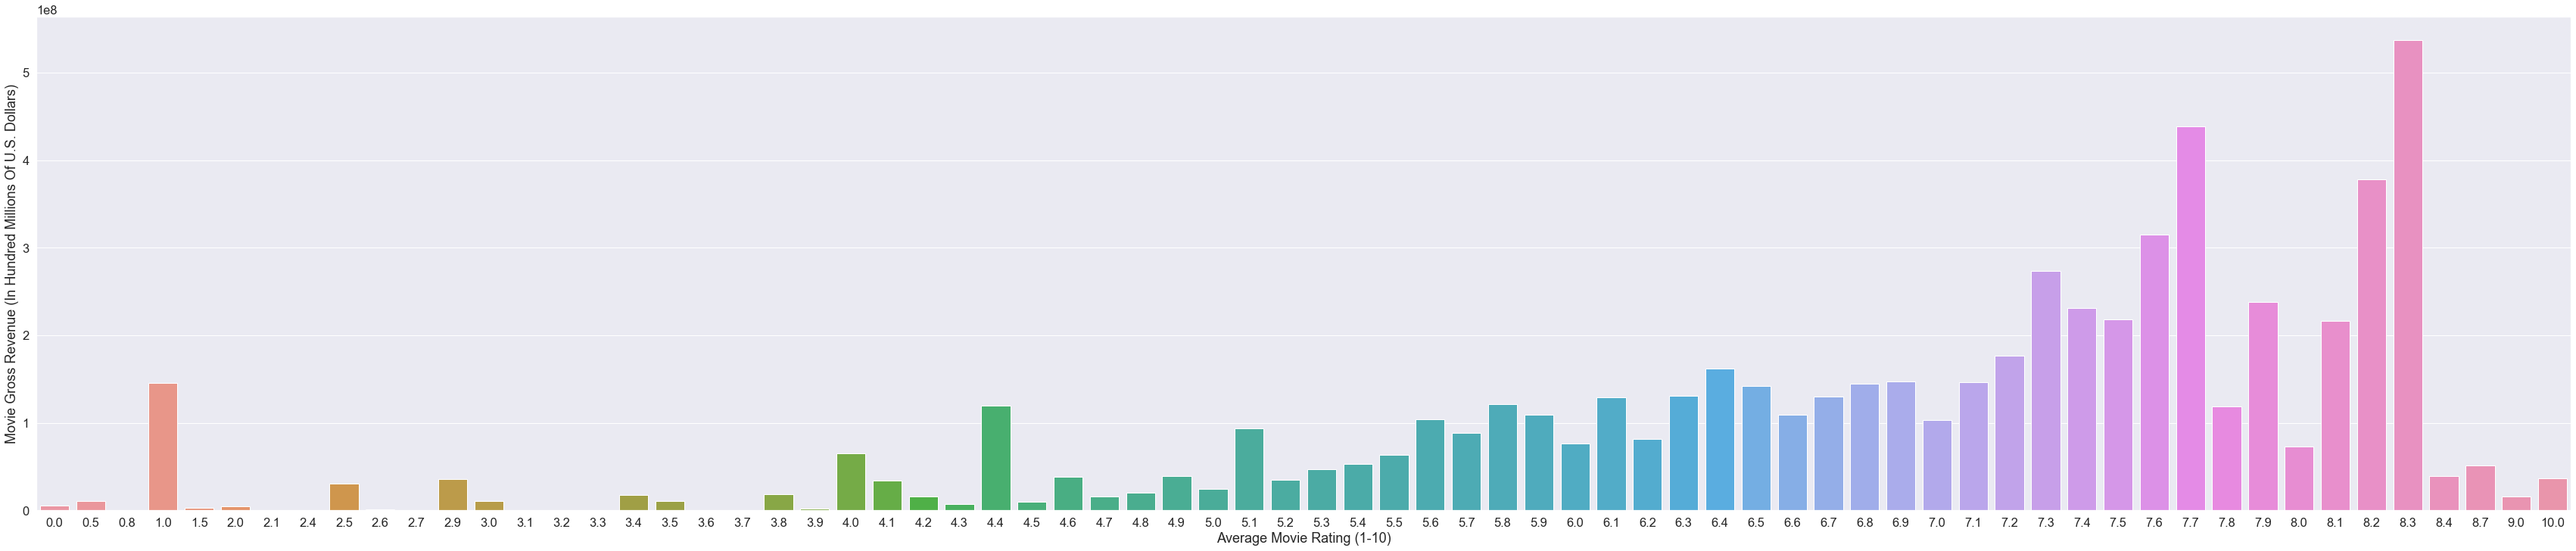

In [1055]:
#scatterplot of vote_average vs. worldwide_gross
fig, ax = plt.subplots()
fig.set_size_inches(60,12)

ax = sns.barplot(x="vote_average", y="worldwide_gross", ci=None, data=df_final)
ax.set(xlabel='Average Movie Rating (1-10)', ylabel='Movie Gross Revenue (In Hundred Millions Of U.S. Dollars)')
sns.set(style='darkgrid', font_scale=2)
plt.show()

##### Observations ^
There seems to be a strong grouping of average movie ratings between 5 & 8...but we don't know how many people are providing that movie rating...perhaps we should compare number of votes vs. average movie ratings first.

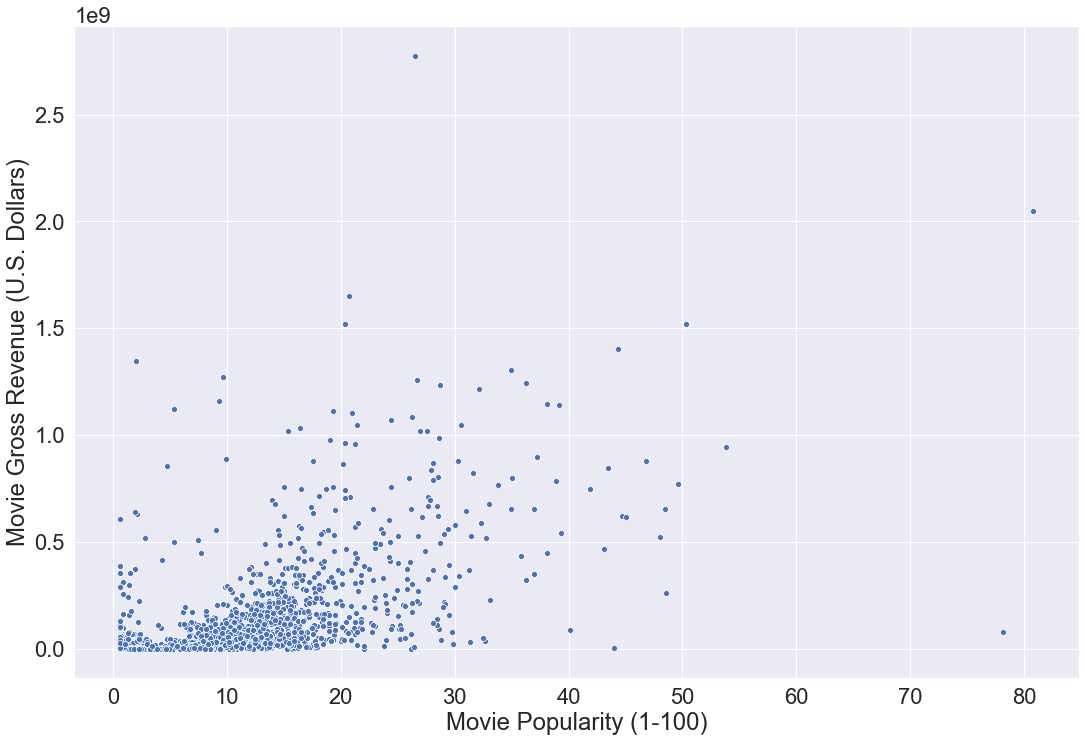

In [1056]:
#scatterplot of popularity vs. worldwide_gross
fig, ax = plt.subplots()
fig.set_size_inches(18,12)

ax = sns.scatterplot(x="popularity", y="worldwide_gross", marker="o", ci=68, data=df_final)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Movie Popularity (1-100)', ylabel='Movie Gross Revenue (U.S. Dollars)')
sns.set(style='darkgrid', font_scale=1.5)
plt.show()

##### Observations ^
There seems to be a strong grouping of data between 0 & 30 on the popularity scale, but once the data goes beyond that, there does not seem to be enough data to suggest any meaningful insights. In conclusion, popularity is not a useful variable.

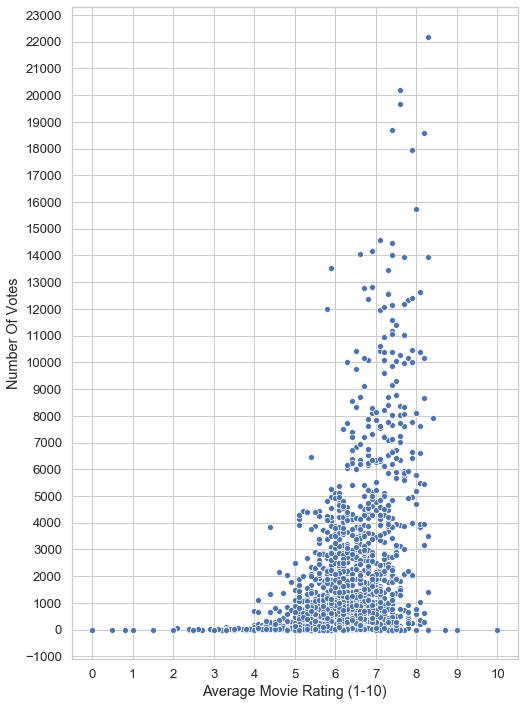

In [1184]:
#scatterplot of vote_count vs. vote_average
fig, ax = plt.subplots()
fig.set_size_inches(8,12)

ax = sns.scatterplot(x="vote_average", y="vote_count", marker="o", ci=68, data=df_final)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Average Movie Rating (1-10)', ylabel='Number Of Votes')
sns.set(style='whitegrid', font_scale=1.2)
plt.show()

##### Observations ^
There are a lot of movies that have under 1000 votes.<br> 

<b>Moving forward</b><br>
Let's only consider movies that have only 1000+ votes, on the "vote_average" vs. "worldwide_gross" graph.<br>
Let's round "vote_average" to the nearest whole number, to decrease the number of bars in the graph and simplify the findings.

In [1058]:
votes_vs_gross = df_final[['vote_count', 'vote_average', 'worldwide_gross']]
votes_vs_gross_1000 = votes_vs_gross.loc[votes_vs_gross['vote_count'] >= 1000]
votes_vs_gross_1000 = votes_vs_gross_1000.round(0)
votes_vs_gross_1000

,vote_count,vote_average,worldwide_gross
movie,,,
10 cloverfield lane,4629,7.0,108286422
12 strong,1312,6.0,71118378
12 years a slave,6631,8.0,181025343
127 hours,4469,7.0,60217171
2 guns,2368,6.0,132493015
21 jump street,6527,7.0,202812429
22 jump street,5167,7.0,331333876
3 days to kill,1279,6.0,38959900
300: rise of an empire,3870,6.0,330780051


<b>Getting the average</b><br>
We need average revenue for all rounded "vote_average" values - so we need a new dataframe.

In [1059]:
votes_vs_gross_1000_grouped = votes_vs_gross_1000.groupby('vote_average', as_index=False).mean()
votes_vs_gross_1000_grouped

,vote_average,vote_count,worldwide_gross
0,4.0,2097.666667,1.716056e+08
1,5.0,2095.552632,1.387786e+08
2,6.0,2750.464832,2.120925e+08
3,7.0,4216.508591,2.565437e+08
4,8.0,7027.465909,3.846821e+08


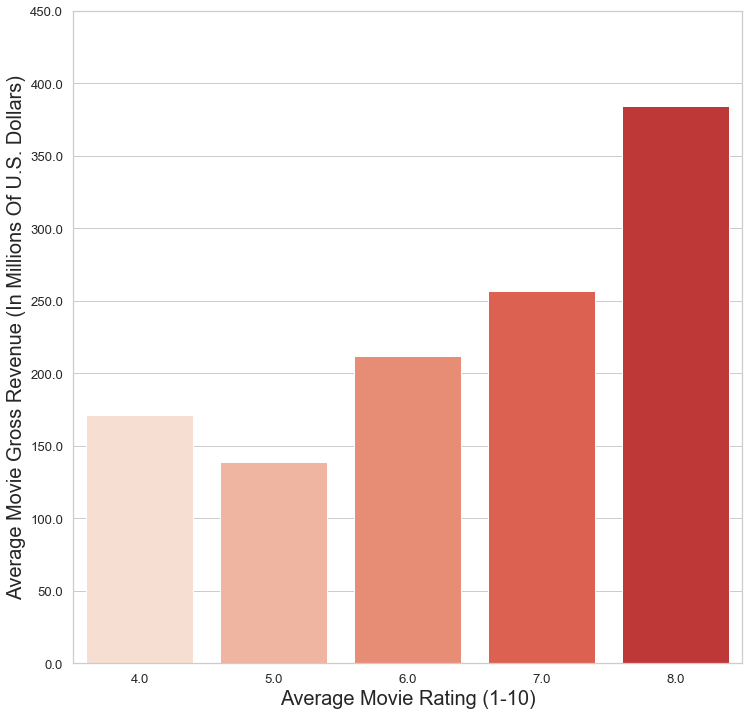

In [1129]:
#scatterplot of vote_average, when vote_count is > 1000, vs. worldwide_gross
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

ax = sns.barplot(x="vote_average", y="worldwide_gross", ci=None, data=votes_vs_gross_1000_grouped)
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette("Reds")
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.ylabel('Average Movie Gross Revenue (In Millions Of U.S. Dollars)', fontsize=20)
plt.xlabel('Average Movie Rating (1-10)', fontsize=20)
plt.show()

## Visualization 4 - VJ

<b>Sorting "genres"</b><br>
We want a graph that shows the genres that make the least money on the left, and the most money on the right. So we need to sort them by "worldwide_gross" in ascending order.

In [1061]:
genres_average = df_final[['genres', 'worldwide_gross']]
genres_average_grouped = genres_average.groupby('genres', as_index=False).mean()
genres_average_grouped_sorted = genres_average_grouped.sort_values(by='worldwide_gross', ascending=True)
genres_average_grouped_sorted

,genres,worldwide_gross
12,music,0.000000e+00
16,sci-fi,8.555000e+03
13,musical,5.318060e+05
5,crime,1.188194e+06
19,western,1.456879e+06
3,biography,4.391098e+06
17,sport,5.745503e+06
9,fantasy,9.355387e+06
15,romance,1.018205e+07
8,family,1.632650e+07


In [1062]:
genres_average_grouped_sorted = genres_average_grouped_sorted.drop(genres_average_grouped_sorted.index[:7])
genres_average_grouped_sorted

,genres,worldwide_gross
9,fantasy,9.355387e+06
15,romance,1.018205e+07
8,family,1.632650e+07
6,documentary,3.778302e+07
7,drama,4.270015e+07
0,action,4.513135e+07
4,comedy,5.448101e+07
14,mystery,5.501409e+07
18,thriller,6.670150e+07
11,mix,1.322848e+08


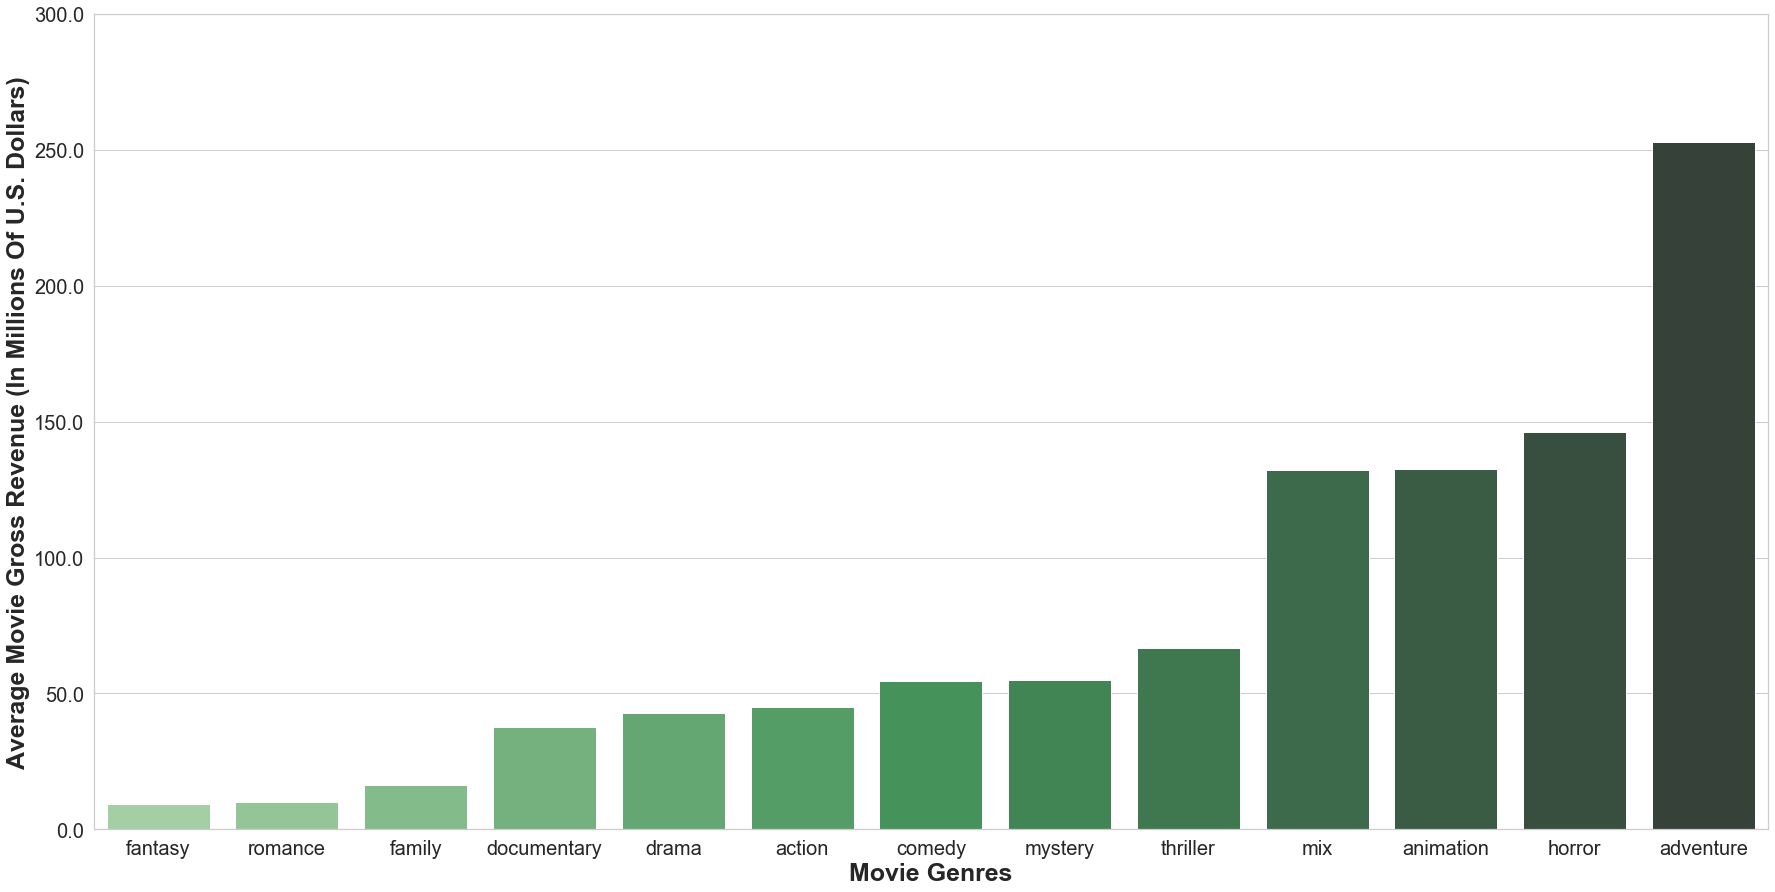

In [1125]:
#scatterplot of genres vs. worldwide_gross (average)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(genres_average_grouped_sorted))
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="genres", y="worldwide_gross", ci=None, palette=np.array(pal[::-1]),data=genres_average_grouped_sorted)
#ax.set(xlabel='Movie Genre', ylabel='Average Movie Gross Revenue (U.S. Dollars)')
plt.xlabel('Movie Genres', fontsize=25, weight = 'bold')
plt.ylabel('Average Movie Gross Revenue (In Millions Of U.S. Dollars)', fontsize=25, weight = 'bold')
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.tick_params(axis='both', which='major', labelsize=20)
#sns.set_style('darkgrid')
plt.show()